<a href="https://colab.research.google.com/github/lblogan14/python_data_analysis/blob/master/Chapter9_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow
TensorFlow (https://www.tensorflow.org) is a library developed by the Google Brain Team.
Other libraries:
* *TensorBoard* - A kit that allows the visualization of internal graphs to TensorFlow
* *TensorFlow Fold* - Produces beautiful dynamic calculation charts
* *TensorFlow Transform* - Created and managed input data pipelines

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Start Programming with TensorFlow

##Installing TensorFlow
For Ubuntu Linux systems,

    pip3 install tensorflow

In [0]:
import tensorflow as tf

##The Model and Sessions in TensorFlow
TensorFlow works through the concept of *model* and *sessions*, which define the structure of a program with a certain sequence of commands.

Variables can be defined directly or parameterized through mathematical expressions on constants.

In [0]:
c = tf.constant(2, name='c')
x = tf.Variable(3, name='x')
y = tf.Variable(c*x, name='y')

In [3]:
print(x)

<tf.Variable 'x:0' shape=() dtype=int32_ref>


You  can't see the defined value of TensorFlow variables using the **print()** function because they belong to the TensorFlow Data Flow Graph, which is a graph with nodes and connections that represent your mathematical model.

Variables involve in the calculation of the deep learning method.

Placeholders involve in the flow of data and in the processing of each single neuron.

Placeholders allow you to build the graph corresponding to the neural network, and to create operations inside without absolutely knowing the data to be calculated.

Given a training set consisting of the value to be analyzed, **X** (a tensor) and an expected value **Y** (a tensor), you will define two placeholders:

In [0]:
X = tf.placeholder('int32')
Y = tf.placeholder('int32')

Once all placeholders and variables are defined, you need to use the **tf.global_variables_initializer()** function to perform the appropriate processing and initialize the whole model.

In [0]:
model = tf.global_variables_initializer()

You need to communicate with the TensorFlow runtime system to start doing the calculations. Thus, a TensorFlow session is created, using **tf.Session()** constructor.

When you start a session, you do nothing but instantiate the model graph.

* **session.extend()** allows you to make changes to the graph during the calculation, such as adding new nodes or connections

* **session.run()** launches the execution of the graph and allows you to obtain the results in output

It is preferred to use the construct **with:** with all calls to methods inherent to it.

In [6]:
with tf.Session() as session:
  session.run(model)
  print(session.run(y))

6


##Tensors
A tensor is identified by three parameters:
* **rank** - Diemsnion of the tensor (a matrix has rank 2, a vector has rank 1)
* **shape** - Number of rows and columns
* **type** - Types of tensor elements

To convert a multidimensional NumPy array to a TensorFlow tensor, use **tf.convert_to_tensor()** function,

In [0]:
t =  np.arange(9).reshape(3,3)
tensor = tf.convert_to_tensor(t, dtype=tf.int32)

To see the content of the tensor, you need to create a TensorFlow session and run it.

In [9]:
with tf.Session() as sess:
  print(sess.run(tensor))

[[0 1 2]
 [3 4 5]
 [6 7 8]]


There are also other functions in TensorFlow to use

In [10]:
t0 = tf.zeros((3,3), 'float64')
with tf.Session() as sess:
  print(sess.run(t0))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [11]:
t1 = tf.ones((3,3), 'float64')
with tf.Session() as sess:
  print(sess.run(t1))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


create random values following uniform distribution using **tf.random_uniform()** function

In [12]:
tensorrand = tf.random_uniform((3,3), minval=0, maxval=1, dtype=tf.float32)
with tf.Session() as sess:
  print(sess.run(tensorrand))

[[0.67398083 0.94064057 0.03044999]
 [0.01415217 0.05712187 0.06749117]
 [0.12191582 0.09027445 0.07290292]]


create random values following normal distribution using **tf.random_normal()** function

In [13]:
norm = tf.random_normal((3,3), mean=0, stddev=3)
with tf.Session() as sess:
  print(sess.run(norm))

[[ 3.5436182 -1.6043367  3.0617301]
 [ 0.5733196 -0.0220973 -1.675467 ]
 [-1.4600718  1.815146  -0.6224831]]


##Operation on Tensors

In [22]:
t1 = tf.random_uniform((3,3), minval=0, maxval=1, dtype=tf.float32)
t2 = tf.random_uniform((3,3), minval=0, maxval=1, dtype=tf.float32)
with tf.Session() as sess:
  print('t1 = ', sess.run(t1))
  print('t2 = ', sess.run(t2))

t1 =  [[0.6325009  0.94219637 0.54254377]
 [0.7835872  0.6965312  0.21743405]
 [0.57713854 0.753374   0.91728127]]
t2 =  [[0.09930766 0.11341953 0.5945724 ]
 [0.16129196 0.1861546  0.5472883 ]
 [0.08877444 0.32661366 0.46988463]]


Examples of operations:

In [23]:
tsum = tf.add(t1, t2)
tmul = tf.matmul(t1, t2)
with tf.Session() as sess:
  print('sum = ', sess.run(tsum))
  print('mul = ', sess.run(mul))

sum =  [[1.4726031 1.3999584 0.9870105]
 [1.6646738 1.1432006 0.9508059]
 [1.6747787 1.0126652 0.9210423]]
mul =  [[1.0203418  0.8716587  0.77667105]
 [1.2021044  0.8015778  0.53409946]
 [1.3069555  0.91202575 0.78512555]]


In [24]:
det = tf.matrix_determinant(t1)
with tf.Session() as sess:
  print('det = ', sess.run(det))

det =  -0.07111181


#Single Layer Perceptron with TensorFlow

##Data to be Analyzed

In [26]:
#Training set
inputX = np.array([[1.,3.],[1.,2.],[1.,1.5],[1.5,2.],[2.,3.],[2.5,1.5],
                   [2.,1.],[3.,1.],[3.,2.],[3.5,1.],[3.5,3.]])
inputY = [[1.,0.]]*6+ [[0.,1.]]*5
print(inputX)
print(inputY)

[[1.  3. ]
 [1.  2. ]
 [1.  1.5]
 [1.5 2. ]
 [2.  3. ]
 [2.5 1.5]
 [2.  1. ]
 [3.  1. ]
 [3.  2. ]
 [3.5 1. ]
 [3.5 3. ]]
[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]


If the label, **inputY**, is [1, 0], it belongs to the first class; if it has [0, 1], then it belongs to the second class.

If the neural network gives you the rsult of a label as

    [0.910, 0.090]
    
This means the result belongs to 91% to the first class, and to 9% to the second class

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


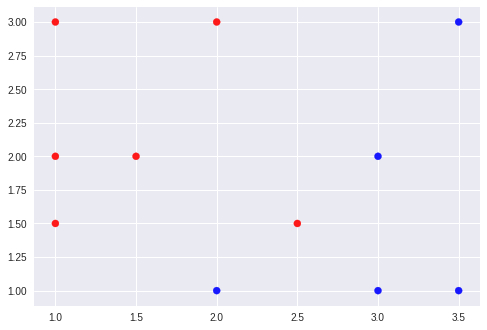

In [27]:
yc = [0]*6 + [1]*5
color = {0:'r', 1:'b'}
c = [color[i] for i in yc]
print(yc)
plt.scatter(inputX[:,0], inputX[:,1], c=c, s=50, alpha=0.9)

##The SLP Model Definition
Define the parameters first,

In [0]:
learning_rate = 0.01
training_epochs = 2000
display_step = 50
n_samples = 11
batch_size = 11
total_batch = int(n_samples/batch_size)
n_input = 2 #size data input (# feasures of each X)
n_classes = 2 #n of classes

Then, build a neural network.

First, define inputs and outputs using the **placeholder**

In [0]:
# tf Graph
#define two neurons in input layer
x = tf.placeholder('float', [None, n_input])
#define two neurons in output layer
y = tf.placeholder('float', [None, n_classes])

Then, define weights and bias using **Variables**

In [0]:
#set model weights
W = tf.Variable(tf.zeros([n_input, n_classes]))
b = tf.Variable(tf.zeros([n_classes]))

Add connections

In [0]:
evidence = tf.add(tf.matmul(x, W), b)
y_ = tf.nn.softmax(evidence)

Finish up model contruction by defining the cost function and optimization method,

In [0]:
#define the mean squared error loss
cost = tf.reduce_sum(tf.pow(y-y_, 2))/ (2*n_samples)
#define gradient descent optimization
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

##Learning Phase
Define two lists that will serve as a container for the results obtained during the learning phase:
* **avg_set** = cost values for each epoch
* **epoch_set** = relative epoch number

In [0]:
avg_set = []
epoch_set = []

Before starting the session, you need to initialize all the variables,

In [0]:
init = tf.global_variables_initializer()

It is possible to intervene within each epoch, thanks to a for loop that scans all the values of **training_epochs**. Within this cycle for each epoch, you will optimize using the **sess.run (optimizer)** command. Furthermore, every 50 epochs, the condition **if% display_step == 0** will be satisfied. Then you will extract the cost value via **sess.run(cost)** and insert it in the
**c** variable that you will use for printing on the terminal as the **print()** argument that stores the **avg_set** list, using the **append()** function. In the end, when the **for** loop has
been completed, you will print a message on the terminal informing you of the end of
the learning phase.

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  for i in range(training_epochs):
    sess.run(optimizer, feed_dict={x:inputX, y:inputY})
    if i % display_step == 0:
      c = sess.run(cost, feed_dict={x:inputX, y:inputY})
      print('Epoch:', '%04d' % (i), 'cost=', '{:.9f}'.format(c))
      avg_set.append(c)
      epoch_set.append(i+1)
  
  print('Training phase finished')

After the learning phase, print a summary table

In [35]:
with tf.Session() as sess:
  sess.run(init)
  
  for i in range(training_epochs):
    sess.run(optimizer, feed_dict={x:inputX, y:inputY})
    if i % display_step == 0:
      c = sess.run(cost, feed_dict={x:inputX, y:inputY})
      print('Epoch:', '%04d' % (i), 'cost=', '{:.9f}'.format(c))
      avg_set.append(c)
      epoch_set.append(i+1)
  
  print('Training phase finished')
  
  #Summary
  training_cost = sess.run(cost, feed_dict={x:inputX, y:inputY})
  print('Training cost =', training_cost, '\nW=', sess.run(W), '\nb=', sess.run(b))
  last_result = sess.run(y_, feed_dict={x:inputX})
  print('Last result =', last_result)

Epoch: 0000 cost= 0.249360293
Epoch: 0050 cost= 0.221041098
Epoch: 0100 cost= 0.198898271
Epoch: 0150 cost= 0.181669712
Epoch: 0200 cost= 0.168204844
Epoch: 0250 cost= 0.157555178
Epoch: 0300 cost= 0.149002746
Epoch: 0350 cost= 0.142023847
Epoch: 0400 cost= 0.136240512
Epoch: 0450 cost= 0.131379008
Epoch: 0500 cost= 0.127239138
Epoch: 0550 cost= 0.123672642
Epoch: 0600 cost= 0.120568052
Epoch: 0650 cost= 0.117840447
Epoch: 0700 cost= 0.115424201
Epoch: 0750 cost= 0.113267884
Epoch: 0800 cost= 0.111330733
Epoch: 0850 cost= 0.109580085
Epoch: 0900 cost= 0.107989423
Epoch: 0950 cost= 0.106537104
Epoch: 1000 cost= 0.105205171
Epoch: 1050 cost= 0.103978693
Epoch: 1100 cost= 0.102845162
Epoch: 1150 cost= 0.101793967
Epoch: 1200 cost= 0.100816056
Epoch: 1250 cost= 0.099903703
Epoch: 1300 cost= 0.099050261
Epoch: 1350 cost= 0.098249912
Epoch: 1400 cost= 0.097497642
Epoch: 1450 cost= 0.096789040
Epoch: 1500 cost= 0.096120216
Epoch: 1550 cost= 0.095487759
Epoch: 1600 cost= 0.094888613
Epoch: 165

Visualization

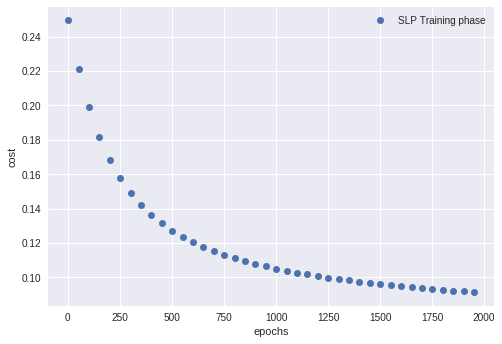

In [36]:
plt.plot(epoch_set, avg_set, 'o', label='SLP Training phase')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend()

To see the prediction result visually,

In [38]:
yc = last_result[:,1]
yc

array([0.04514586, 0.14286745, 0.23836163, 0.2530526 , 0.16340555,
       0.7243516 , 0.70824283, 0.909325  , 0.7398975 , 0.9532338 ,
       0.6212199 ], dtype=float32)

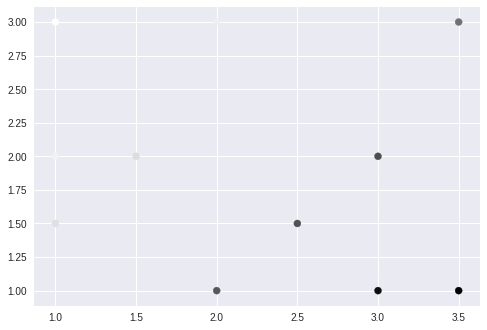

In [39]:
plt.scatter(inputX[:,0], inputX[:,1], c=yc, s=50, alpha=1)

##Test Phase and Accuracy Calculation
define a testing set

In [40]:
#Testing set
testX = np.array([[1.,2.25],[1.25,3.],[2,2.5],[2.25,2.75],[2.5,3.],[2.,0.9],
                  [2.5,1.2],[3.,1.25],[3.,1.5],[3.5,2.],[3.5,2.5]])
testY = [[1.,0.]]*5 + [[0.,1.]]*6
print(testX)
print(testY)

[[1.   2.25]
 [1.25 3.  ]
 [2.   2.5 ]
 [2.25 2.75]
 [2.5  3.  ]
 [2.   0.9 ]
 [2.5  1.2 ]
 [3.   1.25]
 [3.   1.5 ]
 [3.5  2.  ]
 [3.5  2.5 ]]
[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


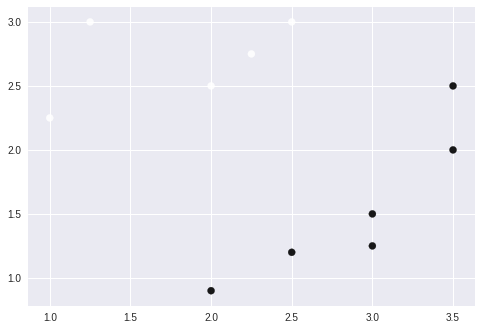

In [41]:
yc = [0]*5 + [1]*6
print(yc)
plt.scatter(testX[:,0],testX[:,1],c=yc, s=50, alpha=0.9)

Now use the testign set to evaluate SLP

In [43]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  
  for i in range(training_epochs):
    sess.run(optimizer, feed_dict={x:inputX, y:inputY})
    
  pred = tf.nn.softmax(evidence)
  result = sess.run(pred, feed_dict={x:testX})
  correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(testY, 1))
  
  #calculate accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
  print('Accuracy:', accuracy.eval({x:testX, y:testY}))

Accuracy: 1.0


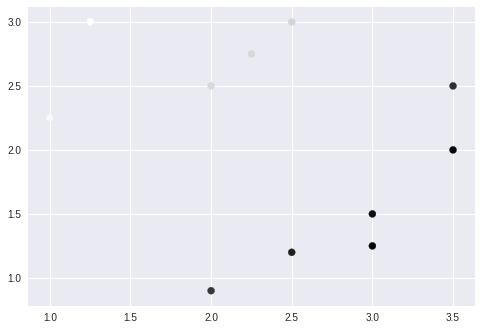

In [44]:
yc = result[:,1]
plt.scatter(testX[:,0],testX[:,1],c=yc, s=50, alpha=1)

#Multi Layer Perceptron (with One Hidden Layer) with TensorFlow
Initiailze the training set and necessary parameters

In [0]:
#Training set
inputX = np.array([[1.,3.],[1.,2.],[1.,1.5],[1.5,2.],[2.,3.],[2.5,1.5],
                   [2.,1.],[3.,1.],[3.,2.],[3.5,1.],[3.5,3.]])
inputY = [[1.,0.]]*6+ [[0.,1.]]*5

learning_rate = 0.001
training_epochs = 2000
display_step = 50
n_samples = 11
batch_size = 11
total_batch = int(n_samples/batch_size)

##The MLP Model Definition
Define two new parameters that define the number of neurons present for each hidden layer.

**n_hidden_1** = # of neurons presented in the first hidden layer

**n_hidden_2** = # of neurons presented in the second hidden layer

In [0]:
#Network Parameters
n_hidden_1 = 2 # 1st layer
n_hidden_2 = 0 # 2nd layer
n_input = 2    # input layer
n_classes = 2  # output layer

# tf Graph input, used for feed_dict{}
X = tf.placeholder('float', [None, n_input])
Y = tf.placeholder('float', [None, n_classes])

# Weights and biases
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
   #'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
   #'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

Define the MLP function to create the model

In [0]:
# Create model
def multilayer_perceptron(x):
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
 #layer_2 = tf.add(tf.matmul(layer_1, weight['h2']), biases['b2'])
  
  #Output fully connected layer with a neuron for each clas
  out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
  return out_layer

In [0]:
# Construct mdoel
evidence = multilayer_perceptron(X)
y_ = tf.nn.softmax(evidence)

The next step is to define the cost function and the optimization method. For MLP, a good choice is the Adam optimizer

In [0]:
cost = tf.reduce_sum(tf.pow(Y-y_, 2))/ (2* n_samples)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

##Learning Phase

In [0]:
avg_set = []
epoch_set = []
init = tf.global_variables_initializer()

In this case you have a training set consisting of a single batch, so you will have only one iteration in which you will directly assign **inputX** and **inputY** to **batch_x** and **batch_y**. In other cases you will need to implement a function, such as **next_batch(batch_size)**, which subdivides the entire training set (for example, **inputdata**) into different batches, progressively returning them as a return value.

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(training_epochs):
    avg_cost = 0.
    # Loop over all batches
    for i in range(total_batch):
      #batch_x, batch_y = inputdata.next_batch(batch_size)
      TO BE IMPLEMENTED
      batch_x = inputX
      batch_y = inputY
      _, c = sess.run([optimizer, cost], feed_dict={X:batch_x, Y:batch_y})
      #                                             ^use placeholders
      #Comput average loss
      avg_cost += c / total_batch

Remember to display the training process

In [53]:
with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(training_epochs):
    avg_cost = 0.
    # Loop over all batches
    for i in range(total_batch):
      #batch_x, batch_y = inputdata.next_batch(batch_size)
      #TO BE IMPLEMENTED
      batch_x = inputX
      batch_y = inputY
      _, c = sess.run([optimizer, cost], feed_dict={X:batch_x, Y:batch_y})
      #Comput average loss
      avg_cost += c / total_batch
    if epoch % display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
      avg_set.append(avg_cost)
      epoch_set.append(epoch + 1)

  print("Training phase finished")
  last_result = sess.run(y_, feed_dict = {X: inputX})
  training_cost = sess.run(cost, feed_dict = {X:inputX, Y: inputY})
  print("Training cost =", training_cost)
  print("Last result =", last_result)

Epoch: 0001 cost=0.224298894
Epoch: 0051 cost=0.178304747
Epoch: 0101 cost=0.154502869
Epoch: 0151 cost=0.134808496
Epoch: 0201 cost=0.119144961
Epoch: 0251 cost=0.107198231
Epoch: 0301 cost=0.098299116
Epoch: 0351 cost=0.091728128
Epoch: 0401 cost=0.086873874
Epoch: 0451 cost=0.083267771
Epoch: 0501 cost=0.080566593
Epoch: 0551 cost=0.078523614
Epoch: 0601 cost=0.076962113
Epoch: 0651 cost=0.075755537
Epoch: 0701 cost=0.074812740
Epoch: 0751 cost=0.074067667
Epoch: 0801 cost=0.073472172
Epoch: 0851 cost=0.072990909
Epoch: 0901 cost=0.072597750
Epoch: 0951 cost=0.072273165
Epoch: 1001 cost=0.072002627
Epoch: 1051 cost=0.071775094
Epoch: 1101 cost=0.071582198
Epoch: 1151 cost=0.071417443
Epoch: 1201 cost=0.071275890
Epoch: 1251 cost=0.071153641
Epoch: 1301 cost=0.071047686
Epoch: 1351 cost=0.070955582
Epoch: 1401 cost=0.070875362
Epoch: 1451 cost=0.070805386
Epoch: 1501 cost=0.070744380
Epoch: 1551 cost=0.070691206
Epoch: 1601 cost=0.070644923
Epoch: 1651 cost=0.070604697
Epoch: 1701 co

Visualization

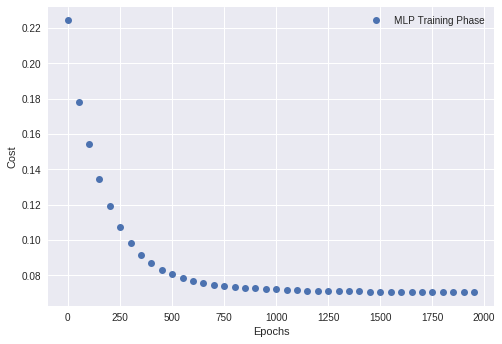

In [54]:
plt.plot(epoch_set, avg_set, 'o', label='MLP Training Phase')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()

##Test Phase and Accuracy Calculation

In [0]:
#Testing set
testX = np.array([[1.,2.25],[1.25,3.],[2,2.5],[2.25,2.75],[2.5,3.],
                  [2.,0.9],[2.5,1.2],[3.,1.25],[3.,1.5],[3.5,2.],[3.5,2.5]])
testY = [[1.,0.]]*5 + [[0.,1.]]*6

In [55]:
with tf.Session() as sess:
  sess.run(init)

  for epoch in range(training_epochs):
    for i in range(total_batch):
      batch_x = inputX
      batch_y = inputY
      _, c = sess.run([optimizer, cost],feed_dict={X: batch_x, Y: batch_y})
      
  # Test model
  pred = tf.nn.softmax(evidence)
  result = sess.run(pred, feed_dict = {X: testX})
  correct_prediction = tf.equal(tf.argmax(pred, 1),tf.argmax(Y, 1))

 # Calculate accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  print("Accuracy:", accuracy.eval({X: testX, Y: testY}))
  print(result)

Accuracy: 1.0
[[0.9804332  0.01956675]
 [0.9898807  0.01011931]
 [0.8599885  0.14001155]
 [0.83424425 0.1657558 ]
 [0.80484074 0.19515923]
 [0.27629542 0.7237046 ]
 [0.15335305 0.8466469 ]
 [0.0527375  0.94726247]
 [0.07913405 0.92086595]
 [0.05455037 0.94544965]
 [0.12085294 0.8791471 ]]


See the classfication result

[0.01956675 0.01011931 0.14001155 0.1657558  0.19515923 0.7237046
 0.8466469  0.94726247 0.92086595 0.94544965 0.8791471 ]


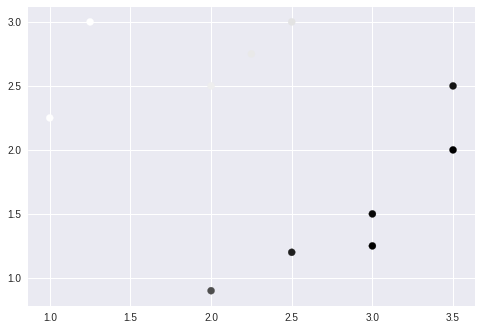

In [56]:
yc = result[:,1]
print(yc)
plt.scatter(testX[:,0],testX[:,1],c=yc, s=50, alpha=1)

#Multi Layer Perceptron (with Two Hidden Layers) with TensorFlow

In [0]:
#Training set
inputX = np.array([[1.,3.],[1.,2.],[1.,1.5],[1.5,2.],[2.,3.],[2.5,1.5],
                   [2.,1.],[3.,1.],[3.,2.],[3.5,1.],[3.5,3.]])
inputY = [[1.,0.]]*6+ [[0.,1.]]*5

learning_rate = 0.001
training_epochs = 2000
display_step = 50
n_samples = 11
batch_size = 11
total_batch = int(n_samples/batch_size)

In [0]:
#Network Parameters
n_hidden_1 = 4 # 1st layer
n_hidden_2 = 2 # 2nd layer
n_input = 2    # input layer
n_classes = 2  # output layer

# tf Graph input, used for feed_dict{}
X = tf.placeholder('float', [None, n_input])
Y = tf.placeholder('float', [None, n_classes])

# Weights and biases
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [0]:
# Create model
def multilayer_perceptron(x):
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  
  #Output fully connected layer with a neuron for each clas
  out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
  return out_layer

In [0]:
# Construct mdoel
evidence = multilayer_perceptron(X)
y_ = tf.nn.softmax(evidence)

# Define cost and optimizer
cost = tf.reduce_sum(tf.pow(Y-y_,2))/ (2 * n_samples)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [63]:
avg_set = []
epoch_set = []
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(training_epochs):
    avg_cost = 0.
    # Loop over all batches
    for i in range(total_batch):
      #batch_x, batch_y = inputdata.next_batch(batch_size)
      #TO BE IMPLEMENTED
      batch_x = inputX
      batch_y = inputY
      _, c = sess.run([optimizer, cost], feed_dict={X:batch_x, Y:batch_y})
      #Comput average loss
      avg_cost += c / total_batch
    if epoch % display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
      avg_set.append(avg_cost)
      epoch_set.append(epoch + 1)

  print("Training phase finished")
  last_result = sess.run(y_, feed_dict = {X: inputX})
  training_cost = sess.run(cost, feed_dict = {X:inputX, Y: inputY})
  print("Training cost =", training_cost)
  print("Last result =", last_result)

Epoch: 0001 cost=0.724721849
Epoch: 0051 cost=0.706739485
Epoch: 0101 cost=0.652321041
Epoch: 0151 cost=0.547482133
Epoch: 0201 cost=0.464600414
Epoch: 0251 cost=0.375666201
Epoch: 0301 cost=0.212439477
Epoch: 0351 cost=0.111055791
Epoch: 0401 cost=0.100351110
Epoch: 0451 cost=0.097798668
Epoch: 0501 cost=0.096397296
Epoch: 0551 cost=0.095323242
Epoch: 0601 cost=0.094314694
Epoch: 0651 cost=0.093210883
Epoch: 0701 cost=0.091844246
Epoch: 0751 cost=0.089976750
Epoch: 0801 cost=0.087256752
Epoch: 0851 cost=0.083373345
Epoch: 0901 cost=0.078871548
Epoch: 0951 cost=0.075403616
Epoch: 1001 cost=0.073655047
Epoch: 1051 cost=0.072931923
Epoch: 1101 cost=0.072560251
Epoch: 1151 cost=0.072280489
Epoch: 1201 cost=0.072027460
Epoch: 1251 cost=0.071789399
Epoch: 1301 cost=0.071566075
Epoch: 1351 cost=0.071359582
Epoch: 1401 cost=0.071172096
Epoch: 1451 cost=0.071005538
Epoch: 1501 cost=0.070861354
Epoch: 1551 cost=0.070740119
Epoch: 1601 cost=0.070641428
Epoch: 1651 cost=0.070563890
Epoch: 1701 co

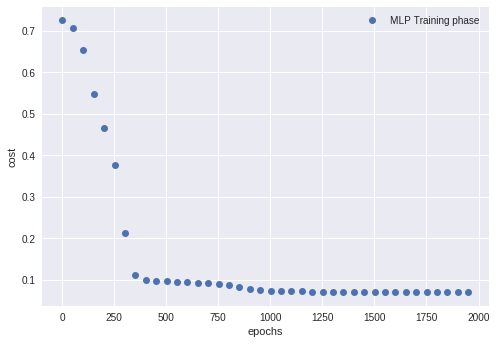

In [64]:
#Visualization of Cost
plt.plot(epoch_set,avg_set,'o',label = 'MLP Training phase')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()

As you can see, learning in this case is much faster than the previous case at 1000 epochs

##Test Phase and Accuracy Calculation

In [0]:
#Testing set
testX = np.array([[1.,2.25],[1.25,3.],[2,2.5],[2.25,2.75],[2.5,3.],
                  [2.,0.9],[2.5,1.2],[3.,1.25],[3.,1.5],[3.5,2.],[3.5,2.5]])
testY = [[1.,0.]]*5 + [[0.,1.]]*6

In [66]:
with tf.Session() as sess:
  sess.run(init)

  for epoch in range(training_epochs):
    for i in range(total_batch):
      batch_x = inputX
      batch_y = inputY
      _, c = sess.run([optimizer, cost],feed_dict={X: batch_x, Y: batch_y})
      
  # Test model
  pred = tf.nn.softmax(evidence)
  result = sess.run(pred, feed_dict = {X: testX})
  correct_prediction = tf.equal(tf.argmax(pred, 1),tf.argmax(Y, 1))

 # Calculate accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  print("Accuracy:", accuracy.eval({X: testX, Y: testY}))
  print(result)

Accuracy: 1.0
[[0.98935    0.01064996]
 [0.9935237  0.00647626]
 [0.8871383  0.11286165]
 [0.8519046  0.14809543]
 [0.80805093 0.19194901]
 [0.36761364 0.6323863 ]
 [0.18355441 0.8164456 ]
 [0.05471478 0.94528526]
 [0.07999396 0.9200061 ]
 [0.04449464 0.9555054 ]
 [0.09508885 0.90491116]]


[0.01064996 0.00647626 0.11286165 0.14809543 0.19194901 0.6323863
 0.8164456  0.94528526 0.9200061  0.9555054  0.90491116]


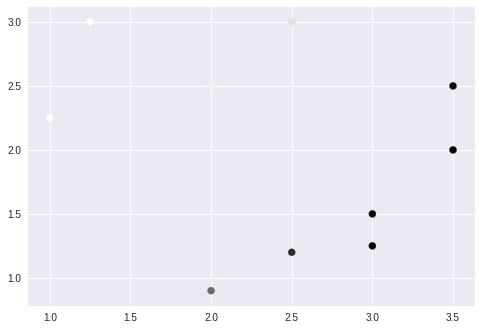

In [67]:
yc = result[:,1]
print(yc)
plt.scatter(testX[:,0],testX[:,1],c=yc, s=50, alpha=1)

##Evaluation of Experimental Data
Move on to the proper classification, passing to the neural network a very large amount of data without knowing what class they belong to.

For example, generate an array of 1000 random points

In [0]:
test = 3* np.random.random((1000,2))

Submit these points to the neural network to determine the class of membership:

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(training_epochs):
    for i in range(total_batch):
      batch_x = inputX
      batch_y = inputY
      _, c = sess.run([optimizer, cost], feed_dict={X:batch_x, Y:batch_y})
      
  #Test Model
  pred = tf.nn.softmax(evidence)
  result = sess.run(pred, feed_dict={X:test})

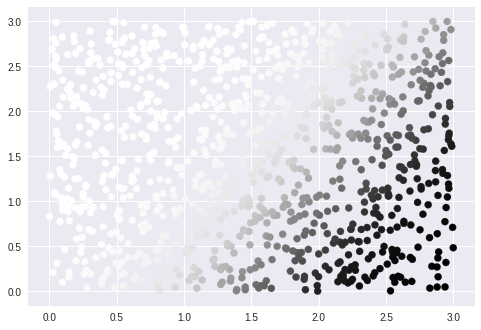

In [70]:
#Visualization of membership
yc = result[:,1]
plt.scatter(test[:,0], test[:,1], c=yc, s=50, alpha=1)

The classification results can be made more comprehensible and clearer by deciding to establish based on the probability if the point belongs to one or the other class. If the probability of a point belonging to a class is greater than 0.5 then it will belong to it.

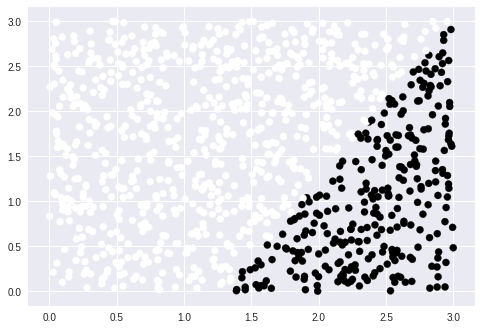

In [71]:
yc = np.round(result[:,1]) #either 0 or 1
plt.scatter(test[:,0],test[:,1],c=yc, s=50, alpha=1)